## Датасет собран из базы данных переписи 1994 года и содержит данные о доходах.
### Информация о данных:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, * Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K,<=50K

## Проведите анализ данных при помощи Pandas выполнив поставленные задачи.
#### 

In [2]:
import pandas as pd

In [3]:
# загружаем датасет
data = pd.read_csv("./data/adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Посчитайте, сколько мужчин и женщин (признак *sex*) представлено в этом датасете**

In [6]:
# count_male = data[data['sex'] == 'Male']['sex'].count()

# count_male = data['sex'].value_counts()


In [7]:
count_male = data['sex'].value_counts()['Male']
count_male

21790

In [8]:
count_female = data['sex'].value_counts()['Female']
count_female

10771

**2. Каков средний возраст мужчин (признак *age*) по всему датасету?**

In [9]:
# average_age_man = data[data['sex'] == 'Male']['age'].mean()
# average_age_man = data[data.sex == 'Male']['age'].mean()
# average_age_man = data[data.sex == 'Male'].age.mean()
             
average_age_man = data.query('sex == "Male"')['age'].mean()
average_age_man

39.43354749885268

**3. Какова доля граждан Соединенных Штатов (признак *native-country*)?**

In [49]:
native_country_usa = data.query('`native-country` == "United-States"')['native-country'].count() \
/ len(data)

native_country_usa

0.895857006848684

**4-5. Рассчитайте среднее значение и среднеквадратичное отклонение возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год**

In [10]:
result1 = data.groupby('salary', as_index = False)['age'].agg(['mean', 'std'])
result1 = result1.rename(columns={'salary': 'Заработная плата','mean': 'Средний возраст', 'std': 'Стандартное отклонение возраста'})
result1

,Заработная плата,Средний возраст,Стандартное отклонение возраста
0,<=50K,36.783738,14.020088
1,>50K,44.249841,10.519028


**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [35]:
result2 = data[data.salary == '>50K'].groupby('education', as_index = False)['salary'].count() 
result2    # Распределение образования среди людей с зп больше 50К


,education,salary
0,10th,62
1,11th,60
2,12th,33
3,1st-4th,6
4,5th-6th,16
5,7th-8th,40
6,9th,27
7,Assoc-acdm,265
8,Assoc-voc,361
9,Bachelors,2221


**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Asian-Pac-Islander*.**

In [62]:
result3 = data.groupby(['race', 'sex'])['age'].describe()
result3

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [72]:
# Создаем новую колонку с обобщенными группами статуса
data_copy = data.copy()
def group_marital_status(x):
    if 'Married' in x:
        return 'Married'
    else:
        return 'Not married'
data_copy['mar_status'] = data_copy['marital-status'].apply(group_marital_status)
data_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,mar_status
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Not married
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Married
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Not married
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Married
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Married


In [102]:
#Количество женатых и неженптых мужчин с зп больше 50К
reach_man = data_copy[(data_copy.salary == '>50K') & (data_copy.sex == 'Male')].groupby('mar_status')['mar_status'].count() 

#Количество женатых и неженптых мужчин всего
all_man = data_copy[data_copy.sex == 'Male'].groupby('mar_status')['mar_status'].count() 

# Доля богатых мужчин среди женатых и неженатых
reach_man_percen = reach_man / all_man
reach_man_percen

mar_status
Married        0.440514
Not married    0.084495
Name: mar_status, dtype: float64

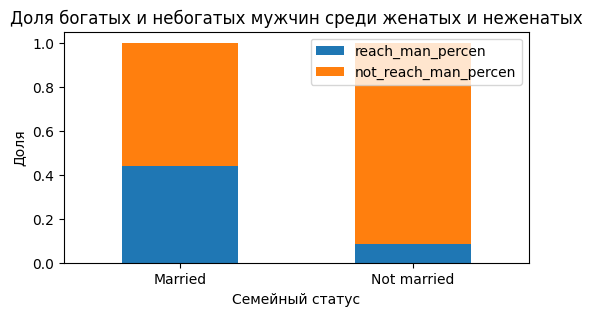

In [106]:
# Построение диаграммы

not_reach_man_percen = 1 - reach_man_percen

# Создание DataFrame для построения графика
df = pd.DataFrame({'reach_man_percen': reach_man_percen, 'not_reach_man_percen': not_reach_man_percen})

# Построение столбчатой диаграммы
ax = df.plot(kind='bar', stacked=True, figsize=(6, 3))
ax.set_xticklabels(df.index, rotation=0)  # Установка меток по оси x без поворота
plt.title('Доля богатых и небогатых мужчин среди женатых и неженатых')
plt.xlabel('Семейный статус')
plt.ylabel('Доля')
plt.show()

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [10]:
# your code

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [11]:
# your code

**11.Сгруппируйте людей по возрастным группам *young*, *adult*, *retiree*, где:**
* *young* соответствует 16-35 лет
* *adult* - 35-70 лет
* *retiree* - 70-100 лет

**Проставьте название соответсвтуещей группы для каждого человека в новой колонке AgeGroup**

In [12]:
# your code

**12-13. Определите количество зарабатывающих >50K в каждой из возрастных групп (колонка AgeGroup), а также выведите название возрастной группы, в которой чаще зарабатывают больше 50К (>50K)**

In [13]:
# your code

**14. Сгруппируйте людей по типу занятости (колонка occupation) и определите количество людей в каждой группе. После чего напишите функциюю фильтрации filter_func, которая будет возвращать только те группы, в которых средний возраст (колонка age) не больше 40 и в которых все работники отрабатывают более 5 часов в неделю (колонка hours-per-week)**

In [14]:
# your code